In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [28]:
df = pd.read_csv("transactions.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [29]:
# Prints random 5 
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
192490,13,PAYMENT,11591.74,C1920128154,0.00,0.00,M1715889061,0.00,0.00,0,0
124333,11,PAYMENT,25283.62,C970107942,19438.00,0.00,M1838557383,0.00,0.00,0,0
159065,12,CASH_OUT,67623.99,C2141812912,0.00,0.00,C1046459309,118060.00,0.00,0,0
181369,12,CASH_OUT,310539.17,C2051010926,625369.41,314830.24,C439950871,2805832.09,3116371.26,0,0
15430,8,CASH_IN,25187.17,C720155857,1649447.64,1674634.81,C981198566,128267.01,1039842.77,0,0


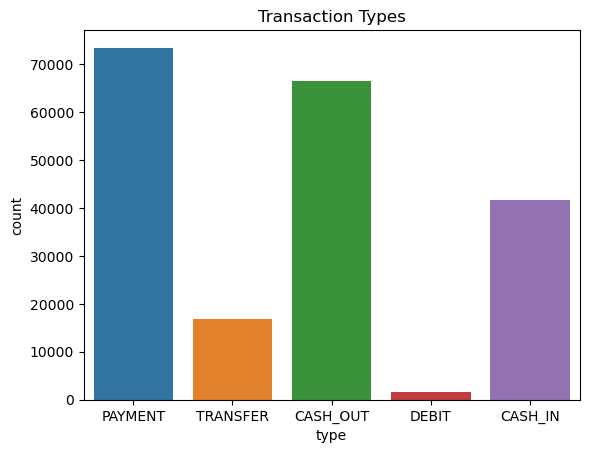

In [30]:
"""
x: This parameter specifies which variable to use for the x-axis. In this case, df.type is passed as the x variable.
df.type: This refers to the type column of the DataFrame df. Each unique value in the type column will be represented
as a separate bar on the x-axis.
"""

sns.countplot(x = df.type)
plt.title("Transaction Types")
plt.show()

'The transaction frequencies can be shown in the transaction types chart (From the highest to the lowest). PAYMENT and CASH_OUT topped the chart. From the "Split by Fraud" Chart, the total frauds are dominated by both TRANSFER and CASH_OUT. Then we see those transactions against the fraud occurrences, 72 for TRANSFER and 75 frauds for CASH_OUT.'

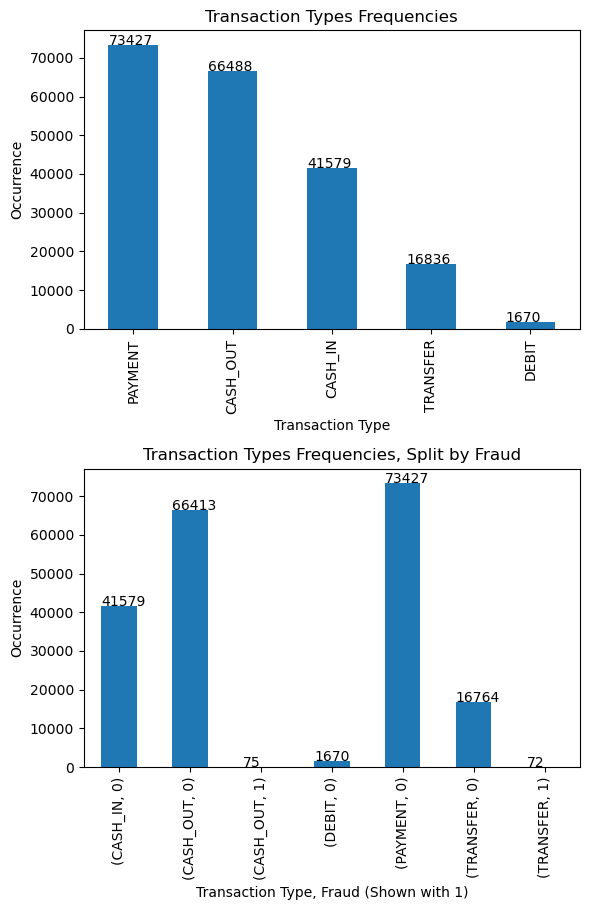

In [31]:
# Type of frequencies
def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts() # Returns the count of each unique value in the type column.
    def transaction_counts_split_by_fraud(df):
        return df.groupby(by=['type', 'isFraud']).size() # calculates the number of occurrences for each unique combination of 'type' and 'isFraud' in the DataFrame 

    fig, axs = plt.subplots(2, figsize=(6,10))
    # Here, we specify 2 to create a layout with 2 rows of subplots.
    # defines the size of the entire figure in inches. In this case, the figure will be 6 inches wide and 10 inches high.
    
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction Types Frequencies') # number of those transactions
    axs[0].set_xlabel('Transaction Type') # types of them
    axs[0].set_ylabel('Occurrence') # how many of them appear
    
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar') # fraud is shown and followed by 1 
    axs[1].set_title('Transaction Types Frequencies, Split by Fraud')
    axs[1].set_xlabel('Transaction Type, Fraud (Shown with 1)')
    axs[1].set_ylabel('Occurrence')

    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return 'The transaction frequencies can be shown in the transaction types chart (From the highest to the lowest).'\
            ' PAYMENT and CASH_OUT topped the chart.'\
            ' From the "Split by Fraud" Chart, the total frauds are dominated by both TRANSFER and CASH_OUT.' \
            ' Then we see those transactions against the fraud occurrences, 72 for TRANSFER and 75 frauds for CASH_OUT.' \

visual_1(df)

'cash out activity.'

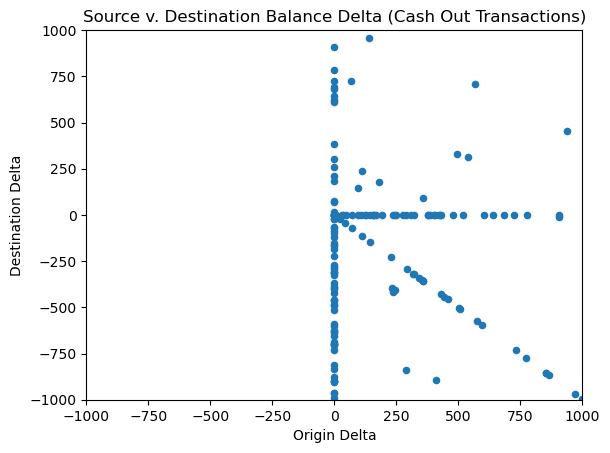

In [32]:
# Source vs Destination Balance Delta
def visual_2(df):
    def query(df):
        df['Origin Delta'] = df['oldbalanceOrg'] -	df['newbalanceOrig']
        df['Destination Delta'] = df['oldbalanceDest'] -	df['newbalanceDest']
        return df[df['type']=='CASH_OUT']
    plot = query(df).plot.scatter(x='Origin Delta',y='Destination Delta')
    plot.set_title('Source v. Destination Balance Delta (Cash Out Transactions)')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return 'cash out activity.'

visual_2(df)

'Of those 199853 that are flagged as frauds, only 147 of them are real frauds.'

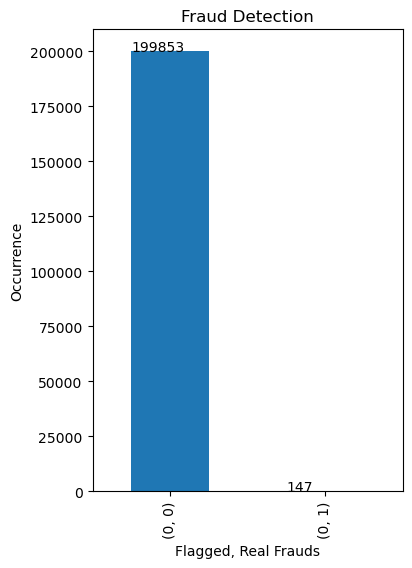

In [33]:
def exercise_custom(df):
    return df[['isFlaggedFraud', 'isFraud']].value_counts() # Counts
    
def visual_custom(df):
    fig, ax = plt.subplots(1, figsize=(4,6))
    exercise_custom(df).plot(ax=ax, kind='bar')
    ax.set_title('Fraud Detection') # title at the top
    ax.set_xlabel('Flagged, Real Frauds')
    ax.set_ylabel('Occurrence') # frequencies
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()))

    return 'Of those 199853 that are flagged as frauds, only 147 of them are real frauds.'\

visual_custom(df)